Assignment 15 sep
Perform Data preprocessing on Titanic dataset

1.Data Collection.
   Please download the dataset from
   https://www.kaggle.com/datasets/yasserh/titanic-dataset

2.Data Preprocessing
    o	Import the Libraries.

    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

###1. import necessary libraries and import dataset

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [70]:
data.shape

(891, 12)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
cor=data.corr()
cor

<ipython-input-73-42f3d3de063e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [75]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

###Handling null values

In [77]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [80]:
mean_age = round(data['Age'].mean(), 1)
print(mean_age)

29.7


In [81]:
data['Age'].replace(np.nan, mean_age, inplace=True)
data.iloc[[5,17,19,26],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.7,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.7,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.7,0,0,2631,7.2250,NaN,C


In [82]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [83]:
mode_embarked = data['Embarked'].mode()[0]
print(mode_embarked)

S


In [84]:
data['Embarked'].replace(np.nan, mode_embarked, inplace=True)
data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [85]:
data.drop(columns='Cabin', inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


data visualization

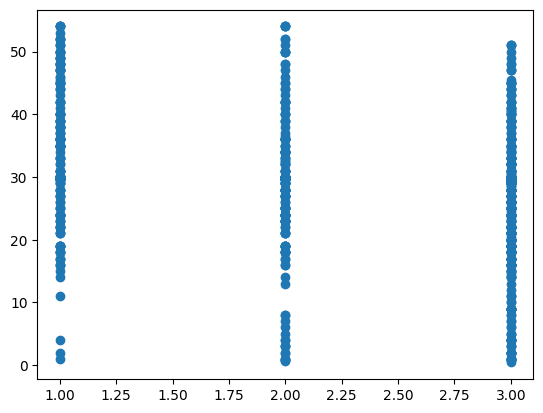

In [113]:
plt.scatter(data["Pclass"],data["Age"])

<Axes: >

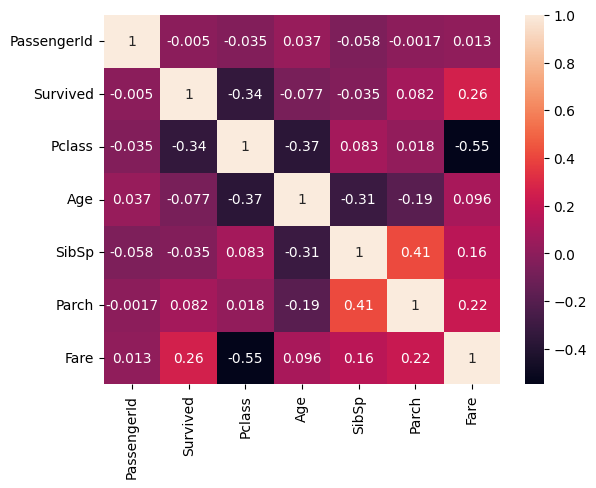

In [114]:
plt.subplots()    #length and width
sns.heatmap(cor,annot=True)

<Axes: >

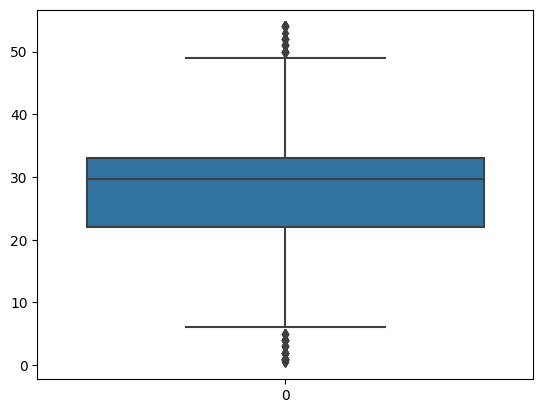

In [115]:
sns.boxplot(data.Age)

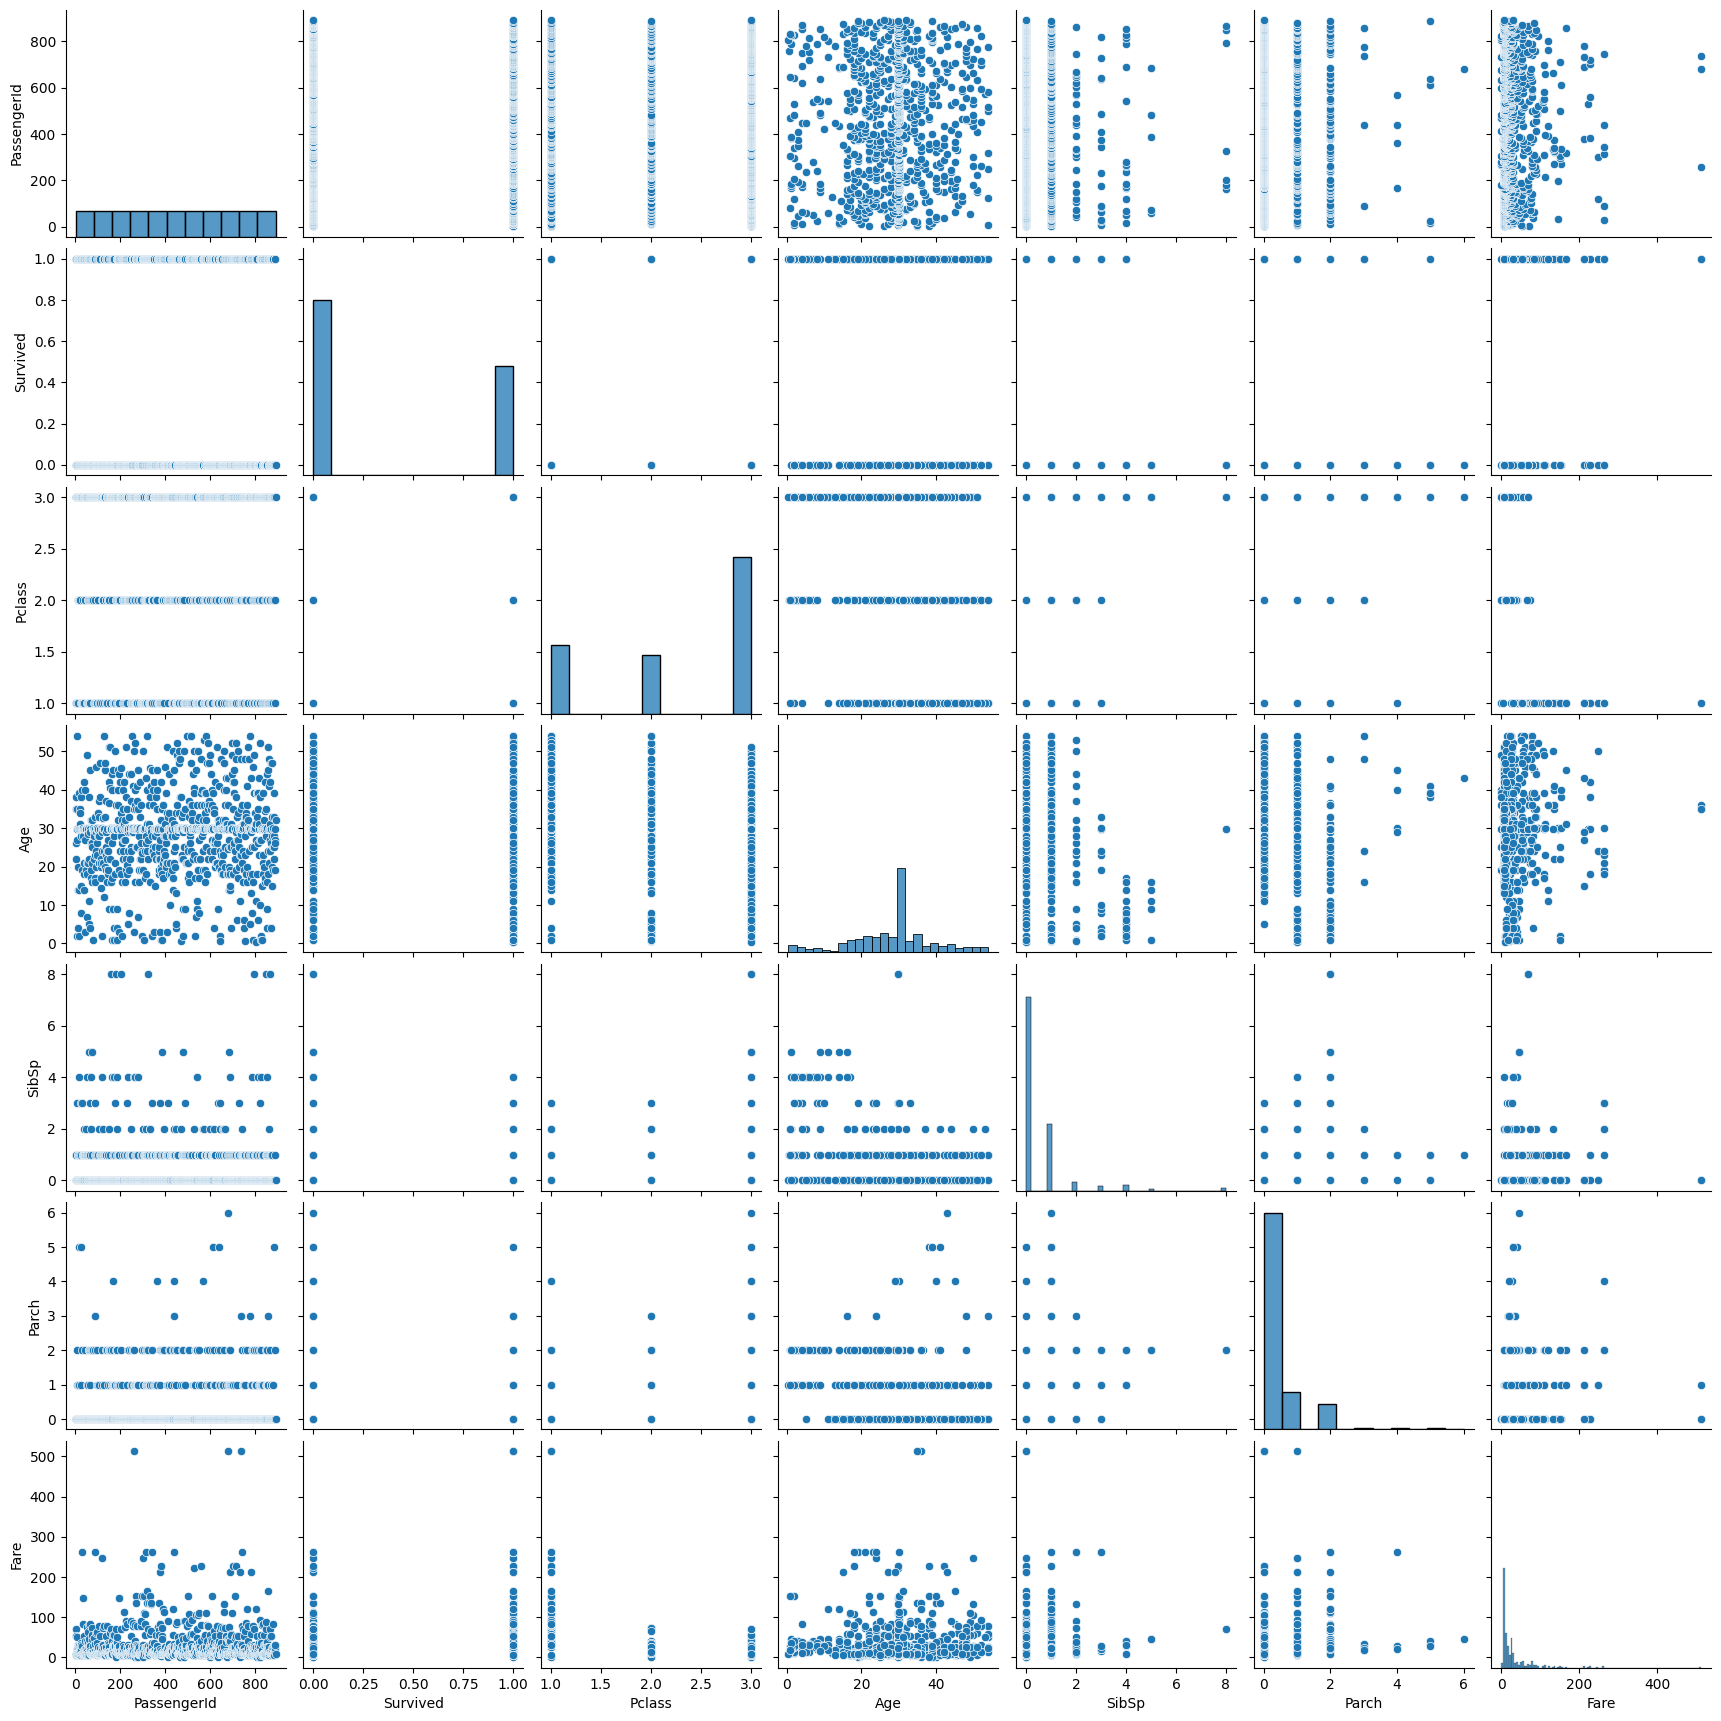

In [116]:
sns.pairplot(data)

<ipython-input-118-904e60fd007e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=data["Sex"],y=data["Age"],ci=0)


<Axes: xlabel='Sex', ylabel='Age'>

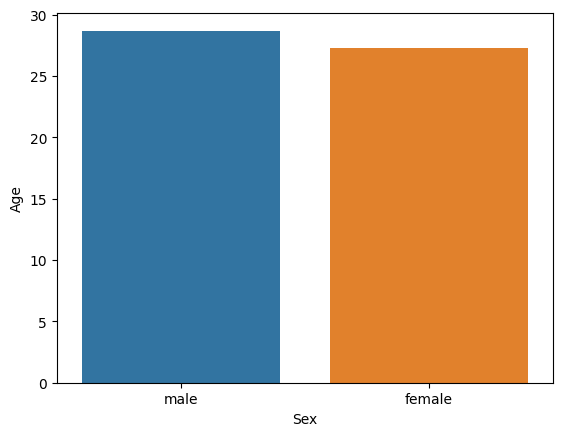

In [118]:
sns.barplot(x=data["Sex"],y=data["Age"],ci=0)

outlier detection

<Axes: >

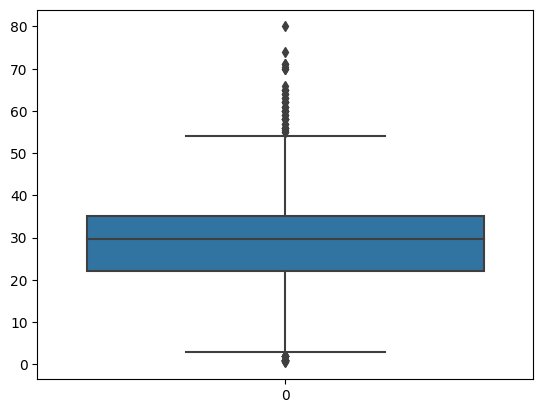

In [86]:
sns.boxplot(data.Age)

In [87]:
#by replacement through median
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [88]:
iqr = q3-q1
iqr

13.0

In [89]:
upper_limit=q3+1.5*iqr
upper_limit

54.5

In [90]:
lower_limit=q1-1.5*iqr
lower_limit

2.5

In [91]:
data.median()

<ipython-input-91-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             29.7000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

<Axes: >

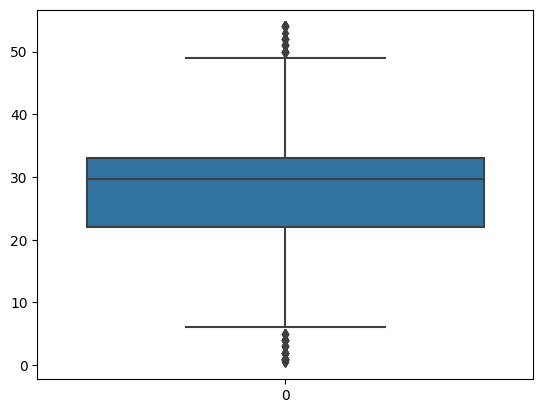

In [92]:
data['Age']=np.where(data['Age']>upper_limit,30,data['Age'])
sns.boxplot(data.Age)

splitting dependant and independant variables

In [93]:
x=data.iloc[:,:9]
y=data["Fare"]
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450


In [94]:
y.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [95]:
data.shape

(891, 11)

In [96]:
x.shape

(891, 9)

In [97]:
y.shape

(891,)

Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le=LabelEncoder()

In [100]:
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [101]:
x["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [102]:
x["Sex"].nunique()

2

In [103]:
x["Name"]=le.fit_transform(x["Name"])
x["Name"]

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Name: Name, Length: 891, dtype: int64

In [104]:
x["Ticket"]=le.fit_transform(x["Ticket"])
x["Ticket"]

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Name: Ticket, Length: 891, dtype: int64

In [105]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,108,1,22.0,1,0,523
1,2,1,1,190,0,38.0,1,0,596
2,3,1,3,353,0,26.0,0,0,669
3,4,1,1,272,0,35.0,1,0,49
4,5,0,3,15,1,35.0,0,0,472


split into training and testing

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [107]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 9), (268, 9), (623,), (268,))

In [108]:
a=[1,2,3,4,5,6]
b=[1,0,1,5,6,3]

for i in range(5):
  a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=0)
  print("with random state",a_train)

with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]


feature scaling

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [112]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 1.59014094,  1.25474307, -1.5325562 , ..., -0.457246  ,
        -0.47299765, -1.55258609],
       [-1.52952238,  1.25474307, -1.5325562 , ...,  0.4033711 ,
        -0.47299765,  1.21331506],
       [-0.23515275, -0.79697591,  0.84844757, ...,  3.8458395 ,
         1.93253327,  1.11032938],
       ...,
       [ 0.70655928, -0.79697591,  0.84844757, ..., -0.457246  ,
        -0.47299765, -0.26281303],
       [ 0.43528421,  1.25474307,  0.84844757, ...,  0.4033711 ,
        -0.47299765, -0.19415591],
       [ 0.91970398, -0.79697591, -0.34205431, ...,  0.4033711 ,
         0.72976781, -0.48840072]])